In [1]:
from lib.fixed_income.rates.treasury_rates import TreasuryRates
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import fredapi
warnings.filterwarnings('ignore')

In [2]:
tr = TreasuryRates()

In [49]:
tr.get()

,date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,2022-08-29,2.45,2.75,2.97,3.32,3.43,3.42,3.45,3.27,3.21,3.12,3.50,3.25
165,2022-08-30,2.43,2.73,2.97,3.31,3.48,3.46,3.47,3.27,3.22,3.11,3.49,3.23
166,2022-08-31,2.40,2.72,2.96,3.32,3.50,3.45,3.46,3.30,3.25,3.15,3.53,3.27
167,2022-09-01,2.53,2.80,2.97,3.34,3.51,3.51,3.54,3.39,3.36,3.26,3.64,3.37


# Absolute Daily Changes

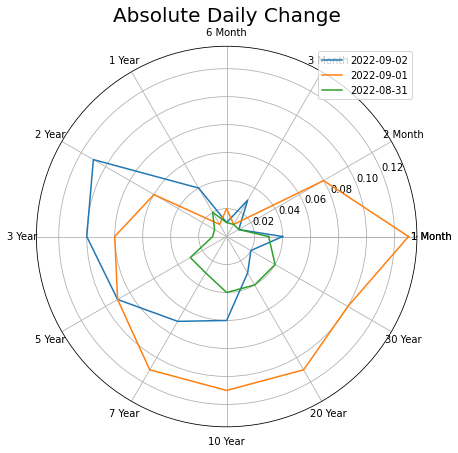

In [4]:
df = tr.change_distribution()

categories = df.columns[1:]
categories = [*categories, categories[0]]

a, b, c = df.iloc[-1, 1:].abs(), df.iloc[-2, 1:].abs(), df.iloc[-3, 1:].abs()
a = [*a, a[0]]
b = [*b, b[0]]
c = [*c, c[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a))

plt.figure(figsize = (12,7))
plt.subplot(polar=True)
plt.plot(label_loc, a, label=df['date'].iloc[-1].date())
plt.plot(label_loc, b, label=df['date'].iloc[-2].date())
plt.plot(label_loc, c, label=df['date'].iloc[-3].date())
plt.title('Absolute Daily Change', size=20, y=1.05)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

# Daily Changes

In [5]:
tr.change_distribution()

,date,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-08-23,0.01,0.00,-0.02,-0.02,-0.03,-0.03,-0.01,0.01,0.02,0.02,0.01,0.02
1,2022-08-24,0.01,0.02,0.02,0.07,0.06,0.07,0.05,0.02,0.06,0.06,0.06,0.06
2,2022-08-25,0.13,0.08,0.06,-0.03,-0.02,-0.01,-0.03,-0.05,-0.09,-0.08,-0.08,-0.07
3,2022-08-26,-0.03,-0.01,0.01,0.01,0.03,0.02,0.03,0.05,0.03,0.01,-0.03,-0.04
4,2022-08-29,0.06,0.06,0.08,0.06,0.07,0.05,0.05,0.07,0.07,0.08,0.06,0.04
5,2022-08-30,-0.02,-0.02,0.00,-0.01,0.05,0.04,0.02,0.00,0.01,-0.01,-0.01,-0.02
6,2022-08-31,-0.03,-0.01,-0.01,0.01,0.02,-0.01,-0.01,0.03,0.03,0.04,0.04,0.04
7,2022-09-01,0.13,0.08,0.01,0.02,0.01,0.06,0.08,0.09,0.11,0.11,0.11,0.10
8,2022-09-02,-0.04,-0.01,-0.03,-0.01,-0.04,-0.11,-0.10,-0.09,-0.07,-0.06,-0.03,-0.02


# Periodic Changes (5, 10, 30, 90 days)

In [40]:
tr.periodic_nominal_changes()

,Change Since,1 Month,2 Month,3 Month,6 Month,1 Year,2 Year,3 Year,5 Year,7 Year,10 Year,20 Year,30 Year
0,2022-08-29,0.04,0.04,-0.03,0.01,0.04,-0.02,-0.01,0.03,0.08,0.08,0.11,0.10
0,2022-08-22,0.22,0.19,0.12,0.10,0.15,0.08,0.08,0.13,0.17,0.17,0.13,0.11
0,2022-07-25,0.35,0.48,0.32,0.27,0.40,0.40,0.46,0.41,0.40,0.39,0.33,0.31
0,2022-04-27,2.12,2.16,2.12,1.94,1.50,0.82,0.69,0.49,0.45,0.38,0.53,0.44


# Points in time

<AxesSubplot:xlabel='index', ylabel='value'>

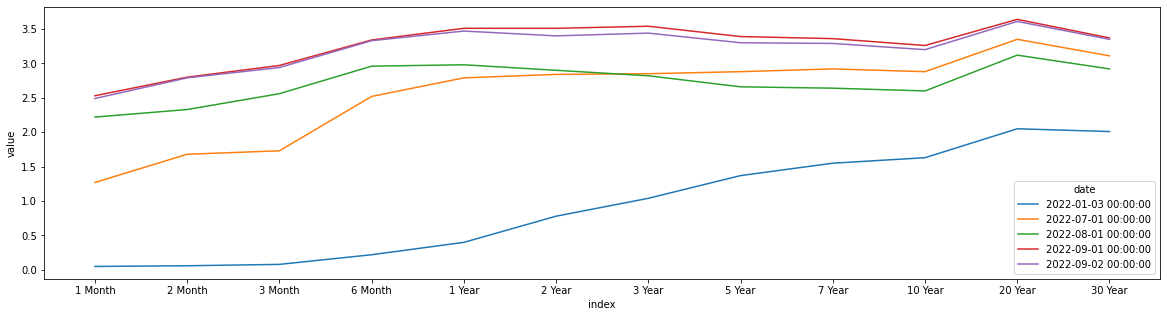

In [7]:
data = tr.point_in_time_curves().reset_index()
melt = data.melt(id_vars=['index'])
plt.figure(figsize = (20,5))
sns.lineplot(data = melt, x = 'index', y = 'value', hue = 'date')

# 10s - 2s Spread

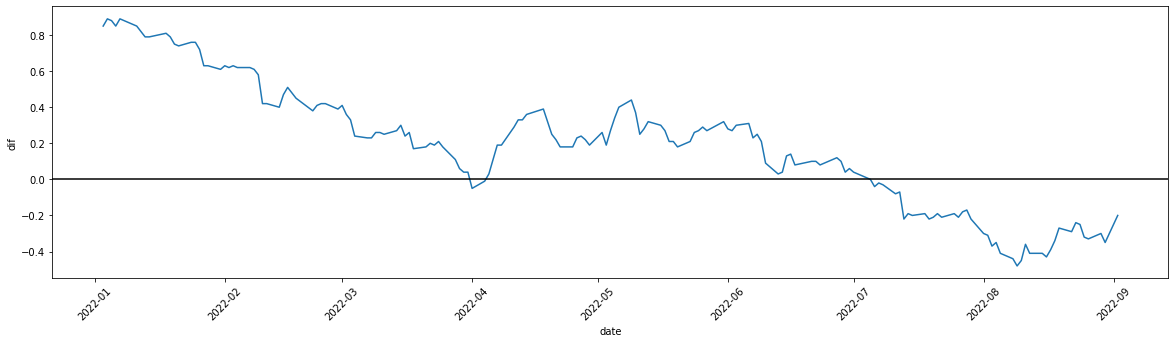

In [8]:
plt.figure(figsize = (20,5))

raw = tr.get()
spread = raw[['date','10 Year', '2 Year']]
spread['dif'] = spread['10 Year'] - spread['2 Year']
g = sns.lineplot(data=spread, x = 'date', y = 'dif')
plt.xticks(rotation=45)
plt.axhline(0, c='black')

In [11]:
fred = fredapi.Fred(api_key='ae9eac413fee6bc7cbe0747b78d0b32c')

In [14]:
# Moodys seasoned bond yields
credit_spreads = fred.get_series('AAA').to_frame().rename(columns={0:'AAA'}).merge( 
    fred.get_series('BAA').to_frame().rename(columns={0:'BAA'}), left_index=True, right_index=True).merge(
    fred.get_series('BAMLH0A0HYM2EY').to_frame().rename(columns={0:'HY'}), left_index=True, right_index=True)
credit_spreads.tail()

,AAA,BAA,HY
2022-03-01,3.43,4.29,5.46
2022-04-01,3.76,4.66,5.86
2022-06-01,4.24,5.27,7.03
2022-07-01,4.06,5.21,8.83
2022-08-01,4.07,5.15,7.51


In [17]:
melt = credit_spreads.reset_index().melt(id_vars=['index'])
melt

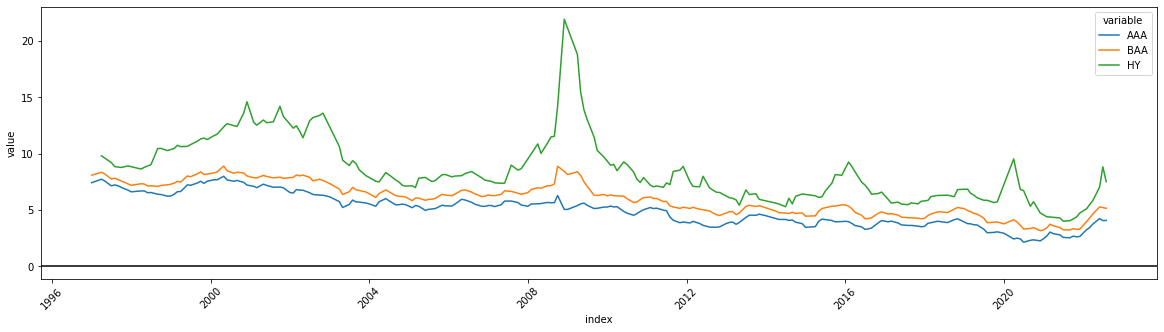

In [21]:
plt.figure(figsize = (20,5))

g = sns.lineplot(data=melt, x = 'index', y = 'value', hue = 'variable')
plt.xticks(rotation=45)
plt.axhline(0, c='black')

In [38]:
(credit_spreads.BAA - credit_spreads.AAA).iloc[-10:].to_frame()

,0
2021-09-01,0.70
2021-10-01,0.67
2021-11-01,0.66
2021-12-01,0.65
2022-02-01,0.72
2022-03-01,0.86
2022-04-01,0.90
2022-06-01,1.03
2022-07-01,1.15
2022-08-01,1.08


# Percent Change from a Year Ago (YoY)

In [29]:
inflation = fred.get_series('PCE').to_frame().rename(columns={0:'PCE'}).merge( 
    fred.get_series('PCEPILFE').to_frame().rename(columns={0:'PCEPILFE'}), left_index=True, right_index=True).merge( # Core PCE 
    fred.get_series('CPIAUCSL').to_frame().rename(columns={0:'CPIAUCSL'}), left_index=True, right_index=True).merge( # CPI 
    fred.get_series('CPILFESL').to_frame().rename(columns={0:'CPILFESL'}), left_index=True, right_index=True) # Core CPI

In [35]:
inflation_yoy = (inflation / inflation.shift(12)) -1
inflation_yoy.iloc[-10:].style.format("{:.2%}").background_gradient(cmap='Blues')

,PCE,PCEPILFE,CPIAUCSL,CPILFESL
2021-10-01 00:00:00,12.12%,4.19%,6.24%,4.59%
2021-11-01 00:00:00,13.30%,4.69%,6.83%,4.95%
2021-12-01 00:00:00,12.88%,4.89%,7.10%,5.48%
2022-01-01 00:00:00,11.34%,5.13%,7.53%,6.04%
2022-02-01 00:00:00,13.17%,5.31%,7.91%,6.42%
2022-03-01 00:00:00,8.88%,5.22%,8.56%,6.44%
2022-04-01 00:00:00,8.24%,4.90%,8.22%,6.13%
2022-05-01 00:00:00,8.75%,4.68%,8.52%,6.01%
2022-06-01 00:00:00,8.60%,4.81%,9.00%,5.91%
2022-07-01 00:00:00,8.66%,4.56%,8.48%,5.91%
